In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

In [4]:
weather_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv',)
weather_df.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
weather_df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
weather_df.shape

(7752, 25)

In [7]:
weather_df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [8]:
weather_df.isnull().any()

station              True
Date                 True
Present_Tmax         True
Present_Tmin         True
LDAPS_RHmin          True
LDAPS_RHmax          True
LDAPS_Tmax_lapse     True
LDAPS_Tmin_lapse     True
LDAPS_WS             True
LDAPS_LH             True
LDAPS_CC1            True
LDAPS_CC2            True
LDAPS_CC3            True
LDAPS_CC4            True
LDAPS_PPT1           True
LDAPS_PPT2           True
LDAPS_PPT3           True
LDAPS_PPT4           True
lat                 False
lon                 False
DEM                 False
Slope               False
Solar radiation     False
Next_Tmax            True
Next_Tmin            True
dtype: bool

In [9]:
weather_df = weather_df.dropna()

In [10]:
weather_df.replace({"Next_Tmin":{'N':0, 'Y':1}}, inplace=True)

In [11]:
weather_df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [12]:
weather_df['LDAPS_PPT2'].value_counts()

LDAPS_PPT2
0.000000    5094
0.001953       7
0.000040       3
0.000781       3
0.000086       2
            ... 
0.007427       1
0.087218       1
0.000695       1
0.047651       1
0.247997       1
Name: count, Length: 2479, dtype: int64

In [13]:
weather_df_num=weather_df.loc[:,['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse','LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]
weather_df_num.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [14]:
weather_df_num.shape

(7588, 19)

In [15]:
weather_df_num.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

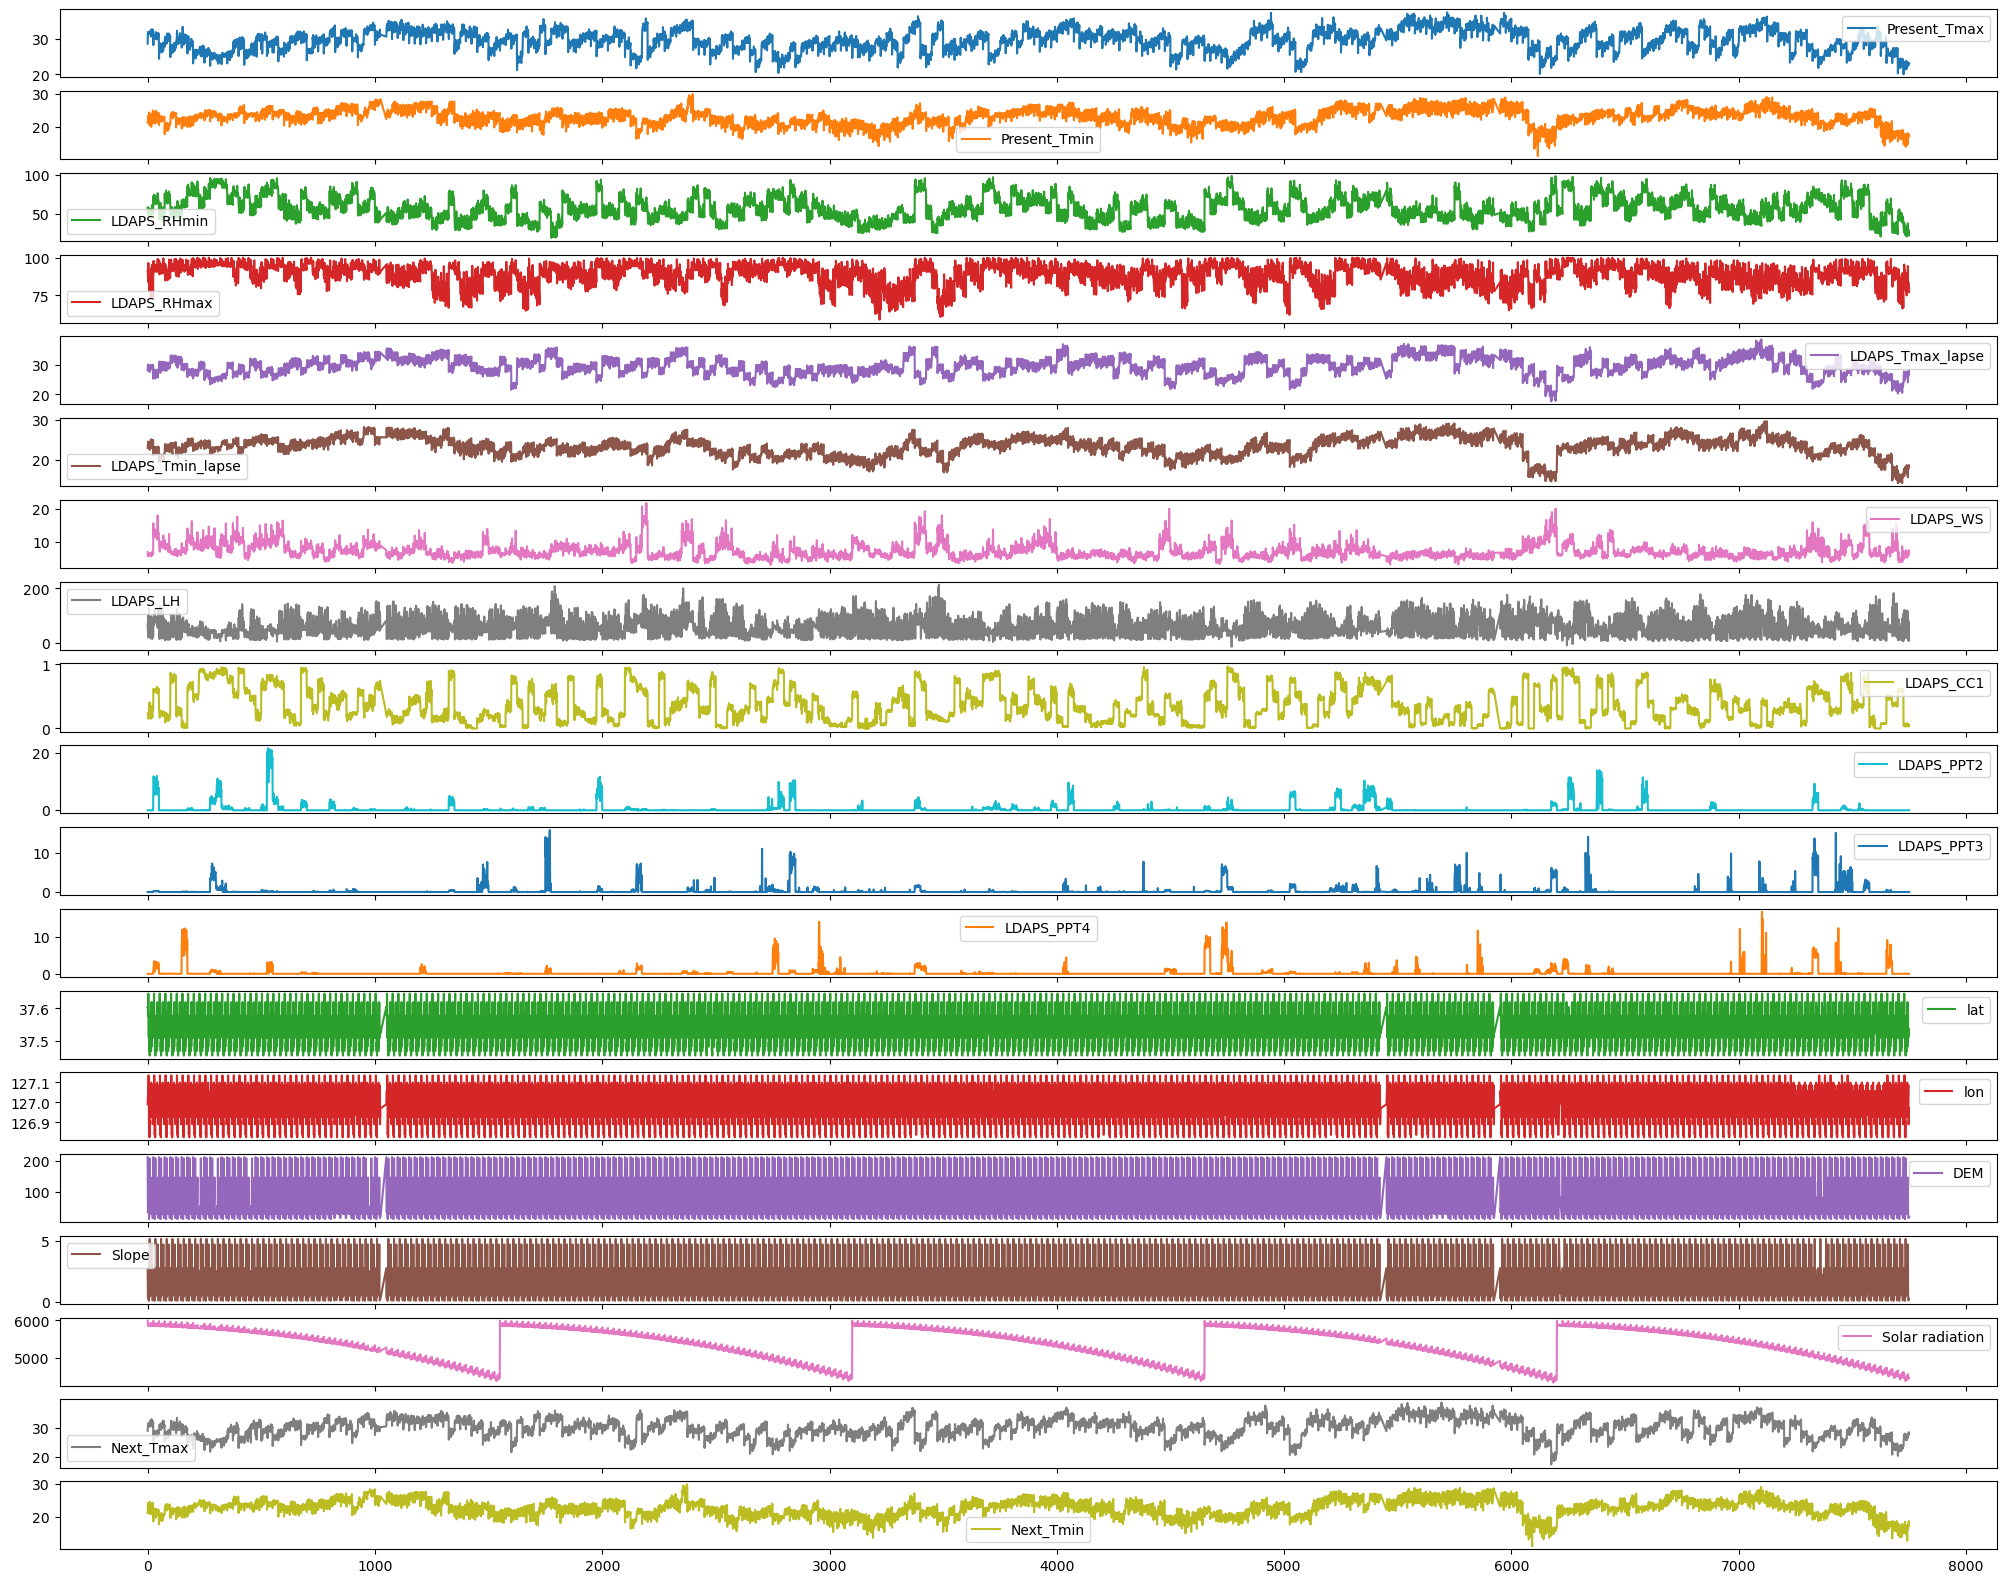

In [16]:
weather_df_num.plot(subplots=True, figsize=(25,20))

In [20]:
weather_df_num['2013':'2014'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))
     

TypeError: cannot do slice indexing on Index with these indexers [2013] of type str

array([[<Axes: title={'center': 'Present_Tmax'}>,
        <Axes: title={'center': 'Present_Tmin'}>,
        <Axes: title={'center': 'LDAPS_RHmin'}>,
        <Axes: title={'center': 'LDAPS_RHmax'}>],
       [<Axes: title={'center': 'LDAPS_Tmax_lapse'}>,
        <Axes: title={'center': 'LDAPS_Tmin_lapse'}>,
        <Axes: title={'center': 'LDAPS_WS'}>,
        <Axes: title={'center': 'LDAPS_LH'}>],
       [<Axes: title={'center': 'LDAPS_CC1'}>,
        <Axes: title={'center': 'LDAPS_PPT2'}>,
        <Axes: title={'center': 'LDAPS_PPT3'}>,
        <Axes: title={'center': 'LDAPS_PPT4'}>],
       [<Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>,
        <Axes: title={'center': 'DEM'}>,
        <Axes: title={'center': 'Slope'}>],
       [<Axes: title={'center': 'Solar radiation'}>,
        <Axes: title={'center': 'Next_Tmax'}>,
        <Axes: title={'center': 'Next_Tmin'}>, <Axes: >]], dtype=object)

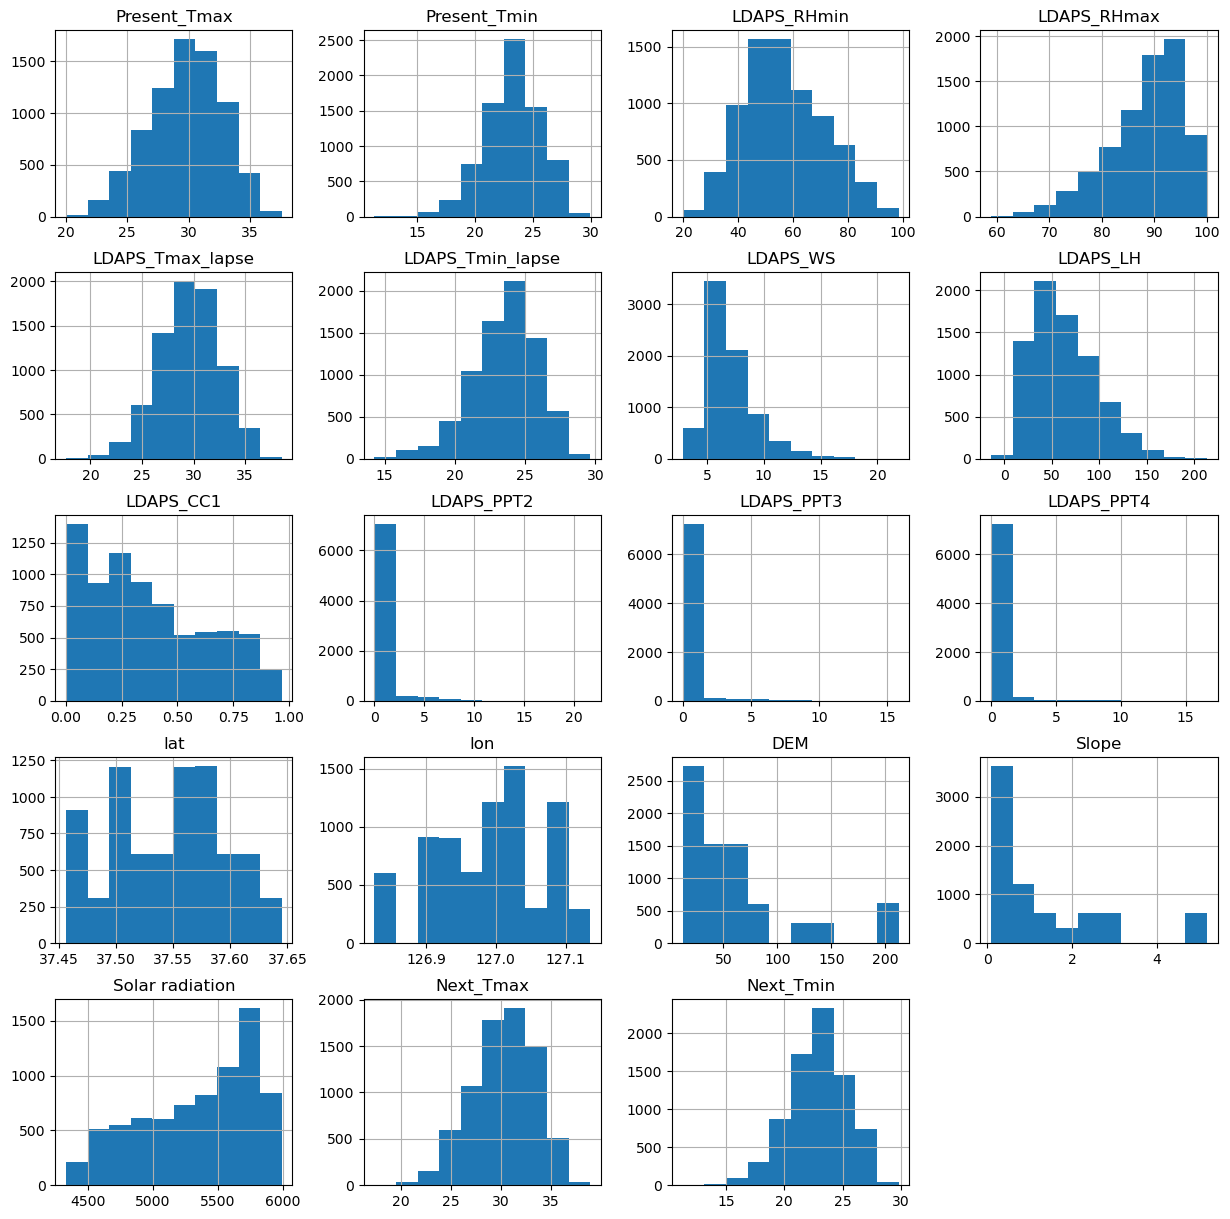

In [21]:
weather_df_num.hist(bins=10,figsize=(15,15))
     

In [24]:
weth=weather_df_num['2013':'2017']
weth.head()
     

TypeError: cannot do slice indexing on Index with these indexers [2013] of type str

In [25]:
weather_y=weather_df_num.pop("Next_Tmax")
weather_x=weather_df_num
     

In [26]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [27]:
train_X.shape

(6070, 18)

In [28]:
train_y.shape

(6070,)

In [29]:
train_y.head()

6276    32.0
404     26.7
5573    35.2
278     24.7
3334    33.0
Name: Next_Tmax, dtype: float64

In [31]:
plt.scatter(weth.maxtempC, weth.Next_Tmax)
plt.xlabel("Maximum Temperature")
plt.ylabel("Temperature")
plt.show()

NameError: name 'weth' is not defined

In [32]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [33]:
prediction = model.predict(test_X)
     

In [35]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.78


In [36]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
3071,30.7,30.37,0.33
4394,29.4,27.08,2.32
5065,23.5,25.33,-1.83
4590,29.7,29.34,0.36
4215,31.1,31.87,-0.77
...,...,...,...
5325,28.0,28.46,-0.46
6496,32.4,31.62,0.78
1229,33.7,31.90,1.80
3279,25.6,28.00,-2.40


In [37]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)
     

DecisionTreeRegressor(random_state=0)

In [38]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

1.1339262187088273

In [39]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.74


In [40]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})
     

,Actual,Prediction,diff
3071,30.7,29.5,1.2
4394,29.4,25.4,4.0
5065,23.5,22.7,0.8
4590,29.7,30.1,-0.4
4215,31.1,30.4,0.7
...,...,...,...
5325,28.0,29.4,-1.4
6496,32.4,31.6,0.8
1229,33.7,30.5,3.2
3279,25.6,29.7,-4.1


In [41]:
from sklearn.metrics import r2_score

In [42]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )
     

Mean absolute error: 1.10
Residual sum of squares (MSE): 2.09
R2-score: 0.78
